<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
dataroot = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/trabajadores/ecetss_ocupados.csv"
df = pd.read_csv(dataroot)
df.head

<bound method NDFrame.head of          codmuestra  hogar  region  ponderaocup  C0P10.2  C0P10.3  C3P16.1  \
0     002-0001-0009      1      10  7376.238659        1       75        1   
1     002-0001-0012      1      10  7376.238659        2       57        1   
2     002-0001-0013      1      10  3688.119329        1       38        2   
3     002-0001-0015      1      10  3688.119329        1       37        2   
4     002-0001-0017      1      10  3688.119329        1       46        2   
...             ...    ...     ...          ...      ...      ...      ...   
8961  584-0090-0157      1      44  2056.344096        1       29        1   
8962  584-0090-0248      1      44  2056.344096        1       51        1   
8963  584-0090-0278      1      44  2056.344096        1       39        1   
8964  584-0090-0309      1      44  2056.344096        1       46        1   
8965  584-0090-0339      1      44  2056.344096        1       47        1   

      C3P16.2  nivel_ed  C3P16.6 

In [3]:
df = df[df.ingreso_op != -99]
df[["C3P16.1", "ingreso_op",'C0P10.3']].describe

<bound method NDFrame.describe of       C3P16.1  ingreso_op  C0P10.3
0           1        7000       75
2           2       32000       38
3           2       15000       37
5           2           0       74
6           1       48000       58
...       ...         ...      ...
8960        1       20000       64
8961        1       30000       29
8962        1       70000       51
8964        1       30000       46
8965        1       70000       47

[7845 rows x 3 columns]>

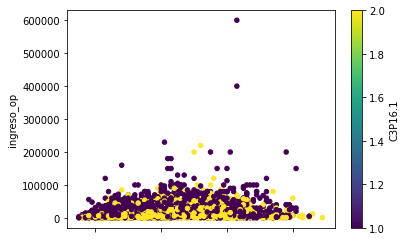

In [4]:
ax2 = df.plot.scatter(x='C0P10.3',

                      y='ingreso_op',

                      c='C3P16.1',

                      colormap='viridis')

In [5]:
#creamos dos dataframes uno para hombres y otro para mujeres

df1 = df[df['C3P16.1'] == 1]
df2 = df[df['C3P16.1'] == 2]

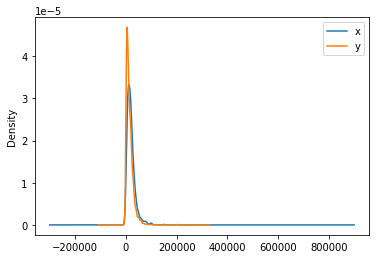

In [6]:
df4 = pd.DataFrame({
    'x': df1.ingreso_op,
    'y': df2.ingreso_op,
})

ax = df4.plot.kde()

In [7]:
for i in df:
  df= df[df[i] != -99]

In [8]:

X=df.drop(['ingreso_op'], axis=1)
X=X.select_dtypes(include=['float','int']).copy()
Y=df.ingreso_op
#print(X.codmuestra)

In [9]:
X[X.isnull().any(axis=1)]

,hogar,region,ponderaocup,C0P10.2,C0P10.3,C3P16.1,C3P16.2,nivel_ed,C3P16.6,C3P16.6.1cod,...,C3P14.8,trabdom_noremu,C3P15.2,C3P15.3,C3P17.1,edadhogar,pershog_ag,edad_0a5,edad_6a11,edad_12a17
0,1,10,7376.238659,1,75,1,2,10,1,NaN,...,NaN,1,1,5,11,1,2,1,1,1
3,1,10,3688.119329,1,37,2,1,10,2,210.0,...,4000.0,1,3,4,3,6,1,1,1,1
5,1,10,181.110014,2,74,2,2,8,1,NaN,...,NaN,1,1,5,12,1,2,1,1,1
6,1,10,181.110014,1,58,1,1,6,1,NaN,...,28000.0,1,1,5,12,6,1,1,1,1
7,1,10,362.220029,2,35,2,2,6,2,221.0,...,NaN,2,3,3,8,6,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,1,44,1145.595498,1,45,2,1,4,1,NaN,...,NaN,1,2,3,6,2,2,1,1,2
8957,1,44,1145.595498,1,36,2,1,4,1,NaN,...,NaN,1,2,2,4,2,3,2,2,2
8958,1,44,1145.595498,1,37,2,1,2,1,NaN,...,NaN,1,3,2,4,2,3,2,1,2
8960,1,44,2056.344096,1,64,1,4,2,1,NaN,...,NaN,1,3,5,4,1,1,1,1,1


In [10]:
X.fillna(X.median(), inplace=True)

# CHi-Squared

In [11]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[3.617e+01 2.825e+03 1.873e+06 7.214e+02 2.261e+03 1.367e+02 2.930e+02
 1.615e+03 3.588e+02 2.271e+02 3.168e+00 4.198e+02 4.304e+01 4.070e+02
 1.048e+02 5.867e+05 7.713e+06 8.808e+02 1.056e+02 1.241e+04 4.448e+03
 1.259e+04 7.762e+03 5.380e+03 2.416e+02 2.087e+04 3.214e+04 9.584e+03
 1.967e+03 4.782e+01 1.324e+03 5.742e+03 1.163e+03 2.836e+03 1.181e+03
 1.671e+04 4.147e+01 9.182e+03 4.071e+02 2.116e+01 6.584e+02 6.733e+03
 7.562e+01 4.570e+03 1.554e+03 2.228e+02 3.757e+01 5.762e-01 4.378e-01
 7.354e-01 1.374e-01 8.986e-01 1.428e+02 1.027e+02 5.585e+03 1.301e+04
 9.203e+01 1.013e+04 2.211e+02 3.354e+04 2.302e+04 4.718e+01 1.237e+04
 7.787e+02 2.392e+04 1.352e+02 2.581e+04 7.333e+00 3.200e+04 1.440e+01
 3.014e+01 1.193e+01 2.387e+01 3.366e+01 1.110e+01 3.399e-01 3.067e+00
 1.197e+04 1.191e+04 4.280e+02 2.951e+01 8.088e+01 9.527e+01 7.905e+01
 1.099e+02 7.140e+01 7.494e+01 5.739e+01 6.239e+02 5.289e+02 4.194e+02
 4.345e+02 4.173e+02 5.959e+02 4.236e+02 4.969e+02 4.463e+02 5.076e+02
 4.158

# Ridge regression

In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(normalize=False)

In [13]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [14]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 291.565 * X0 + -69.894 * X1 + -0.129 * X2 + -222.091 * X3 + 75.044 * X4 + -3926.753 * X5 + 198.109 * X6 + 1027.82 * X7 + -2544.465 * X8 + -10.09 * X9 + -34.444 * X10 + 1228.369 * X11 + -54.27 * X12 + -545.092 * X13 + -7707.089 * X14 + -0.06 * X15 + -0.018 * X16 + -28.078 * X17 + 653.224 * X18 + -17.085 * X19 + -2169.379 * X20 + -8.16 * X21 + 260.534 * X22 + -112.836 * X23 + -423.449 * X24 + -13.278 * X25 + -2.065 * X26 + -69.682 * X27 + -21.666 * X28 + -1019.362 * X29 + -5.143 * X30 + -42.674 * X31 + -36.727 * X32 + -113.341 * X33 + 6.966 * X34 + 99.518 * X35 + 1344.685 * X36 + 845.322 * X37 + -15.381 * X38 + -168.931 * X39 + 22.91 * X40 + -11.42 * X41 + 25.859 * X42 + -4.265 * X43 + 139.949 * X44 + -342.804 * X45 + -326.706 * X46 + -4609.0 * X47 + 2012.511 * X48 + 899.206 * X49 + 22439.511 * X50 + -34784.98 * X51 + -18.962 * X52 + 235.807 * X53 + -20.268 * X54 + -18.212 * X55 + -5.319 * X56 + -1095.024 * X57 + -1891.363 * X58 + -20.907 * X59 + 3.965 * X60 + -282.494 * X61

# Eliminando atributos con varianza baja

In [15]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[1.000e+01, 7.376e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+01, 3.688e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+01, 1.811e+02, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [4.400e+01, 1.146e+03, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        2.000e+00],
       [4.400e+01, 2.056e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [4.400e+01, 2.056e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

# SelectFromModel

In [16]:
X.shape

(7327, 370)

In [17]:


lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(7327, 209)

# Seleccion de atributos basada en arboles

In [18]:
X.shape

(7327, 370)

In [19]:


clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
clf.feature_importances_ 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(7327, 151)

# Eliminacion recursiva de atributos

In [20]:
# Feature extraction
model = LogisticRegression()
rfe=RFE(model,n_features_to_select=100)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 100
Selected Features: [False  True  True False  True False False  True False  True  True False
 False False False  True  True False False  True  True  True  True  True
 False  True  True  True False False False False False False  True  True
 False  True False False False False False False  True False False False
 False False False False False False False False False  True False  True
  True False  True False  True False  True False  True False False False
 False False False False False  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False  True False False  True  True  True False False
 False  True  True  True  True  True  True  True False False  True False
 False  True  True  True False False  True  True False False False False
 False False False False False False  True False False False False False
 False  True F

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
